In [1]:
from brian2 import *
prefs.codegen.target = 'numpy'

In [2]:
%matplotlib inline
# Change the default figure size
plt.rcParams['figure.figsize'] = (10, 5)
%xmode minimal

Exception reporting mode: Minimal


## Exercise 1

We model a single neuron with a noisy membrane potential as in the tutorial. Note that the model written below switched off the noise by setting its standard deviation (`sigma_noise`) to 0.

In [3]:
start_scope()
E_L = -70*mV
V_threshold = -50*mV
C = 100*pF
g_L = 10*nS
tau = C/g_L
I_ext = 0.21*nA       # TODO: change to 0.15*nA for question 1, see below
sigma_noise = 0.*mV   # TODO: change to get ~33 spikes, see question 1 below
neurons = NeuronGroup(1, 'dV/dt = (g_L*(E_L-V) + I_ext)/C + sigma_noise*xi*tau**-0.5: volt',
                      threshold='V>V_threshold', reset='V=E_L', method='euler')
# Initialize values
neurons.V = 'rand()*10*mV + E_L'

# record membrane potential and spikes
v_mon = StateMonitor(neurons, 'V', record=True)
spike_mon = SpikeMonitor(neurons)

# run simulation
run(1*second)

Number of spikes:  33


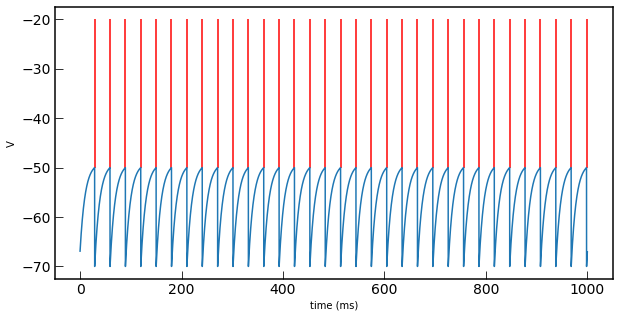

In [4]:
fig, ax = plt.subplots()
ax.plot(v_mon.t/ms, v_mon.V[0]/mV)
ax.vlines(spike_mon.t/ms, V_threshold/mV, -20., color='r')
ax.set(xlabel='time (ms)', ylabel='V')
print('Number of spikes: ', spike_mon.count[0])

### Question 1:
In the above code, change the value of the external current `I_ext` to `0.15*nA`, and increase the value for `sigma_noise` so that the neuron generates roughly as many spikes as before (i.e., when `I_ext=0.21*nA` and `sigma_noise=0*mV`).

### Question 2:
How do the generated spike trains differ between the simulations with and without noise? How could you quantify this difference (*hint*: have a look at lecture 3)? Note: just reply how you *would* quantify it, no need to actually do it. 

**Answer**: *TODO*

## Exercise 2

The following network has three neurons that connect to each other in a circular fashion, i.e. neuron 0 connects to neuron 1, neuron 1 connects to neuron 2, and neuron 2 connects back to neuron 0. Only the first neuron receives a direct current stimulation.

```
    +
    |
    | external stimulus
    |
    v
+---+-+
|     +----------+
|  0  |          |
+--+--+          |
   ^             v
   |          +--+--+
   |          |     |
+--+--+       |  1  |
|     |       +-----+
|  2  +<---------+
+-----+
```

In [5]:
start_scope()
tau = 10*ms
sigma_noise = 10*mV
theta_stim = 0.; sigma_stim = pi/8; amp_stim = 0.4*nA  # stimulus parameters
tau_e = 10*ms
N_E = 400

# excitatory neurons
neurons = NeuronGroup(N_E, '''dV/dt = (g_L*(E_L-V) + I_stim + I_syn)/C: volt
                              dI_syn/dt = -I_syn/tau_e : amp
                              I_stim : amp (constant)''',
                      threshold='V>V_threshold', reset='V=E_L', method='euler')
neurons.V = 'E_L + 10*mV*rand()'
neurons.I_stim[0] = 0.25*nA # we only set a current for the first neuron

# Synapses
w = 0.3*nA
connections = Synapses(neurons, neurons, on_pre='I_syn += w')
# This means: connect 0->1, 1->2, 2->0
connections.connect(i=[0, 1, 2], j=[1, 2, 0])

state_mon = StateMonitor(neurons, ['V', 'I_syn'], record=True)
run(1*second)

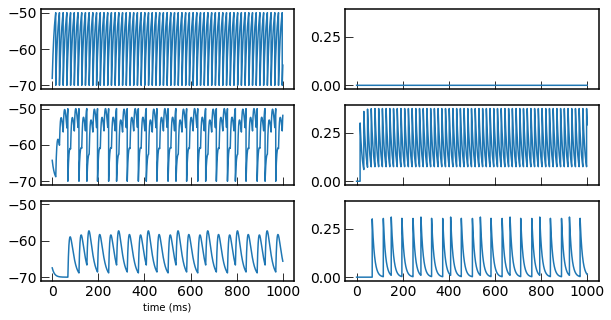

In [6]:
fig, ax = plt.subplots(3, 2, sharex=True, sharey='col')
ax[0, 0].plot(state_mon.t/ms, state_mon.V[0]/mV)
ax[1, 0].plot(state_mon.t/ms, state_mon.V[1]/mV)
ax[2, 0].plot(state_mon.t/ms, state_mon.V[2]/mV)
ax[0, 1].plot(state_mon.t/ms, state_mon.I_syn[0]/nA)
ax[1, 1].plot(state_mon.t/ms, state_mon.I_syn[1]/nA)
ax[2, 1].plot(state_mon.t/ms, state_mon.I_syn[2]/nA)
ax[2, 0].set(xlabel='time (ms)');

### Question 3
Describe the above plot: what is plotted in the three subplots and why do you see the respective patterns?

**Answer**: *TODO*

## Question 4

If you change the value of the synaptic strength `w` in the above code to `0.35*nA`, strange things happen. Can you explain what is going on?

**Answer**: *TODO*